In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/Electricity BILL.csv'
data = pd.read_csv(file_path)
print(data)

      Building_Type  Construction_Year  Number_of_Floors  \
0       Residential               1989                12   
1     Institutional               1980                 6   
2        Industrial               2006                10   
3        Commercial               1985                 1   
4        Industrial               2006                12   
...             ...                ...               ...   
1245    Residential               1985                10   
1246     Commercial               2007                 5   
1247     Commercial               1990                 1   
1248  Institutional               2021                 6   
1249    Residential               2017                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                      50.000000                477.681762   
1                     225.759107                200.000000   
2                      98.755927                200.000000   
3                      68.47069

In [ ]:
building_status_mapping = {
    'Closed': 0,
    'Under Maintenance': 1,
    'Operational': 2
}

In [ ]:
maintenance_priority_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}



In [ ]:
Building_Type_mapping={
    "Residential":0,
    "Institutional":1,
    "Industrial" : 2,
    "Commercial" : 3


}

In [ ]:
data['Building_Status'] = data['Building_Status'].map(building_status_mapping)
data['Maintenance_Priority'] = data['Maintenance_Priority'].map(maintenance_priority_mapping)
data['Building_Type'] = data['Building_Type'].map(Building_Type_mapping)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



data = shuffle(data, random_state=42)

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)


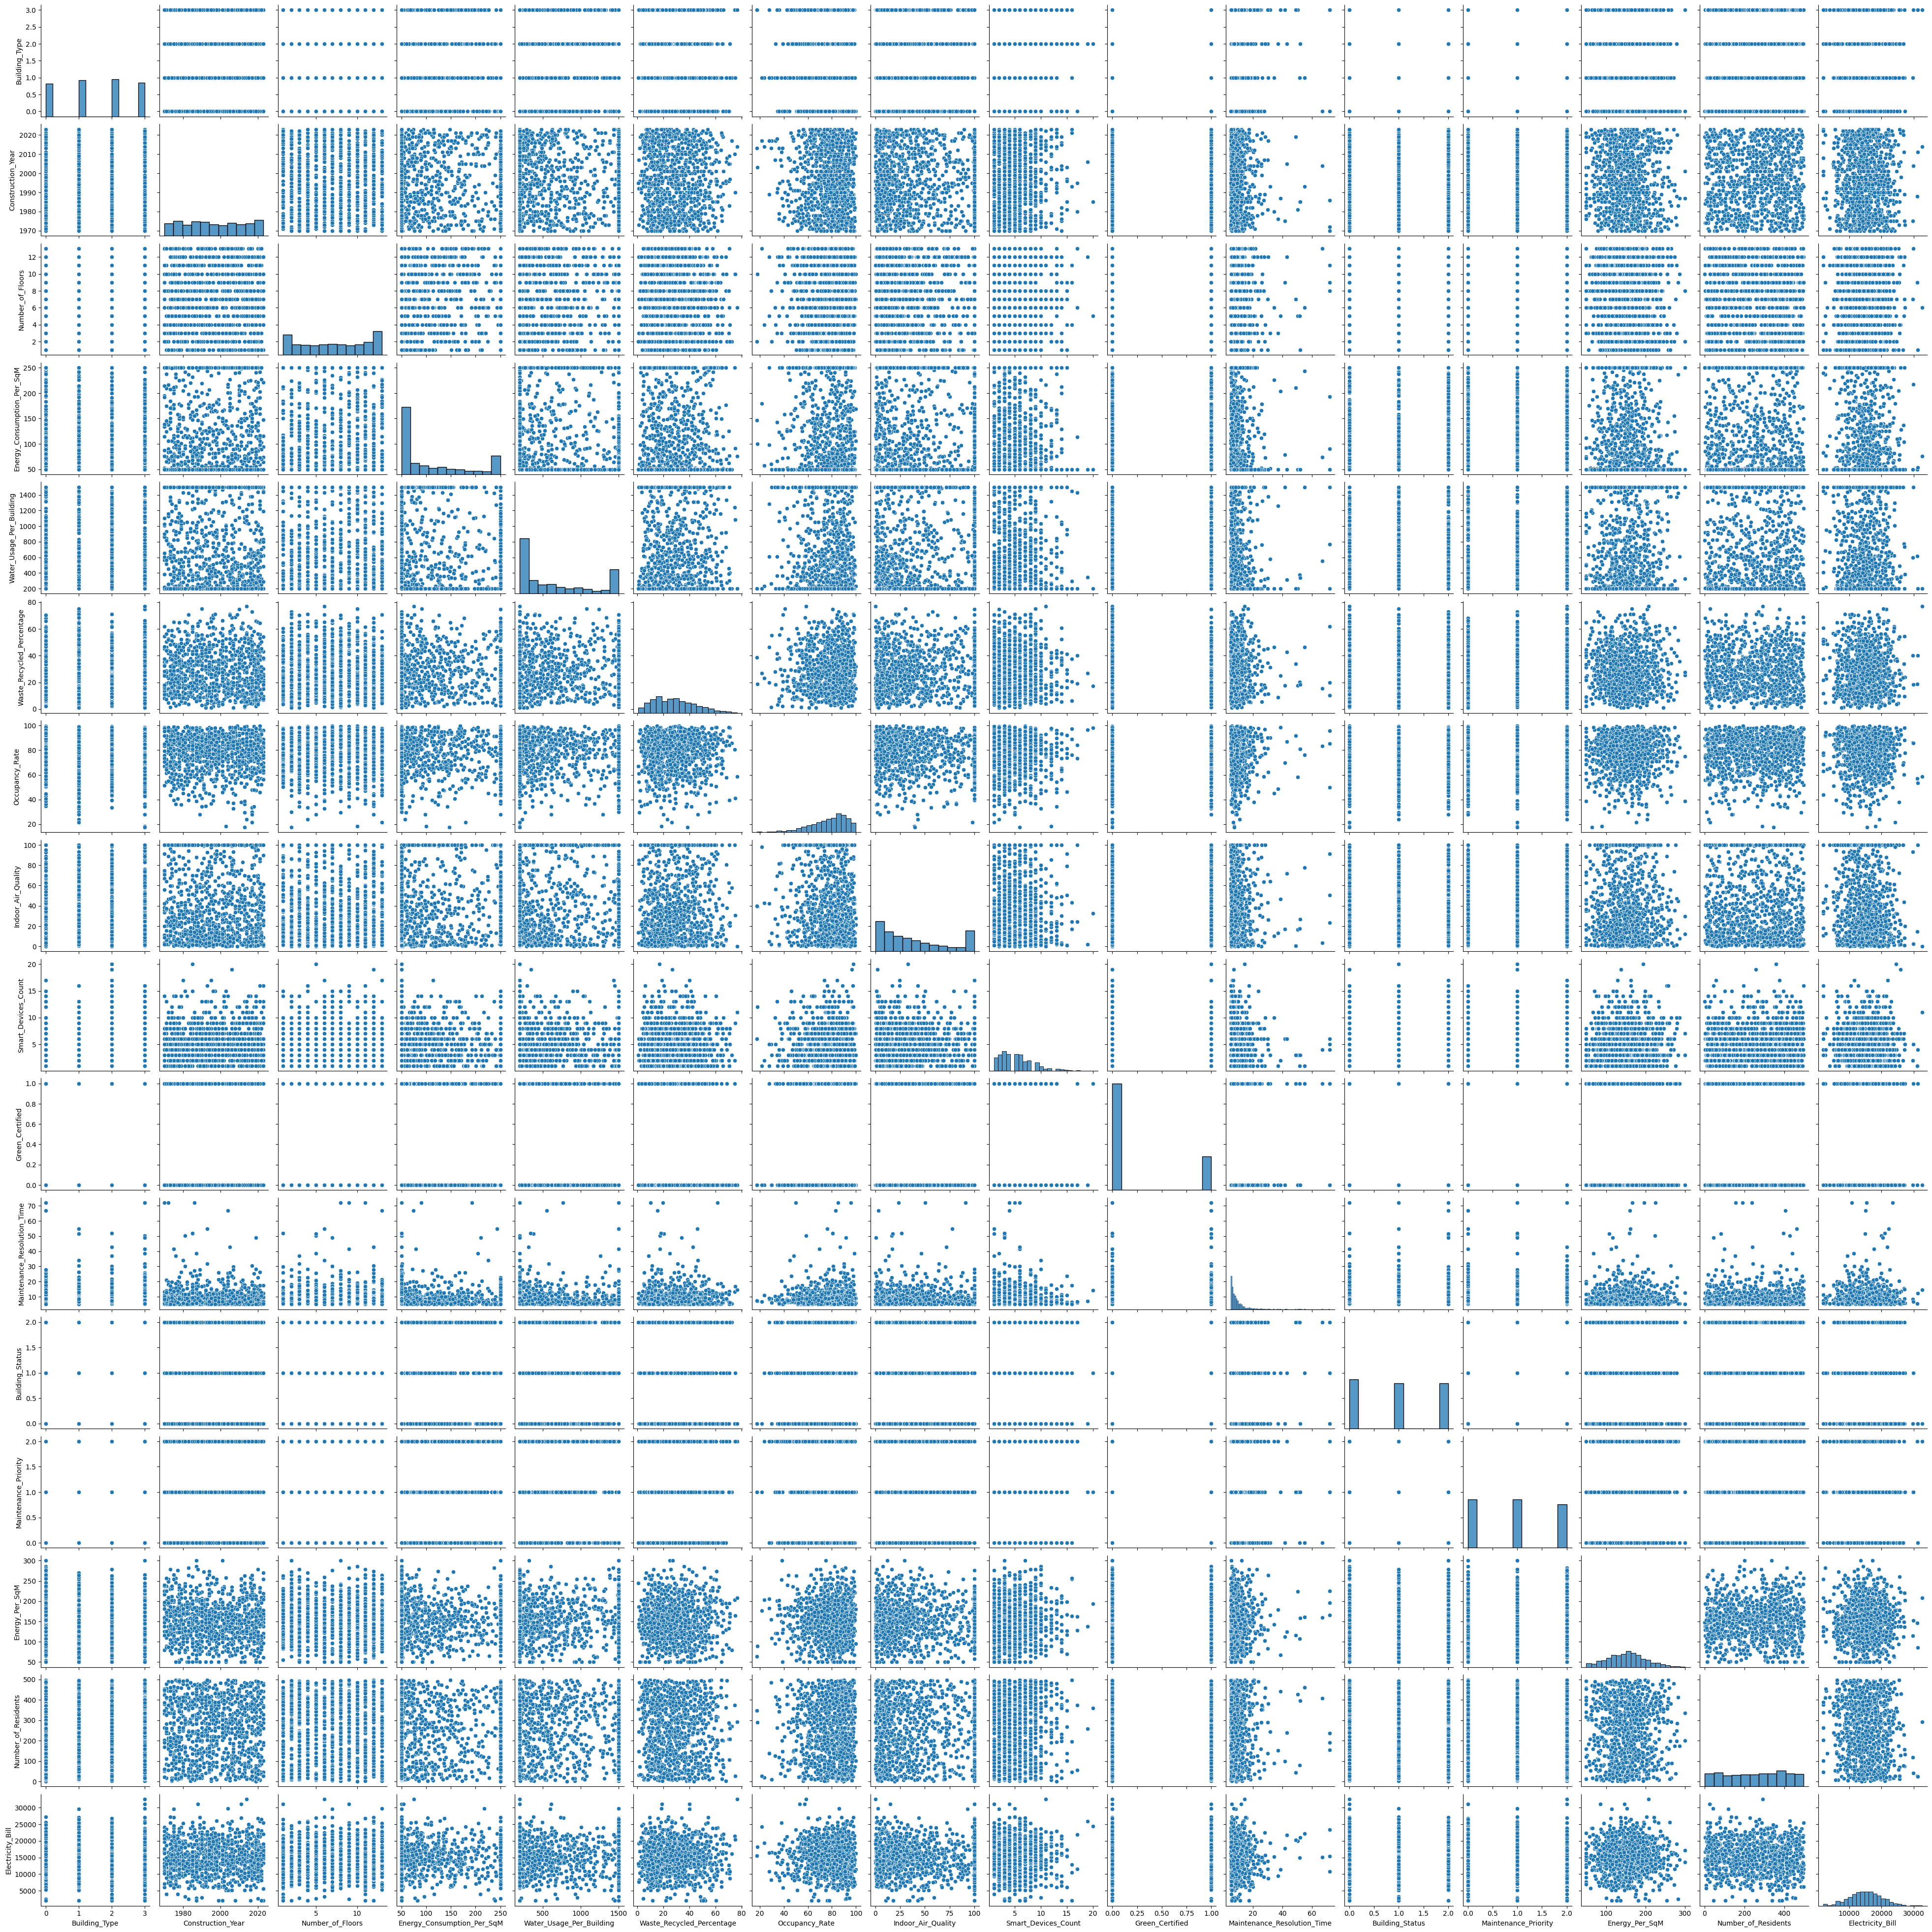

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_df)
plt.show()


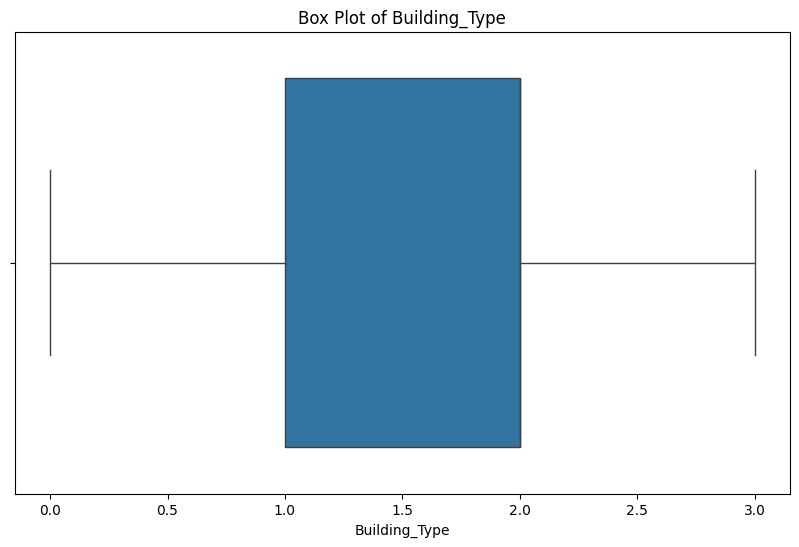

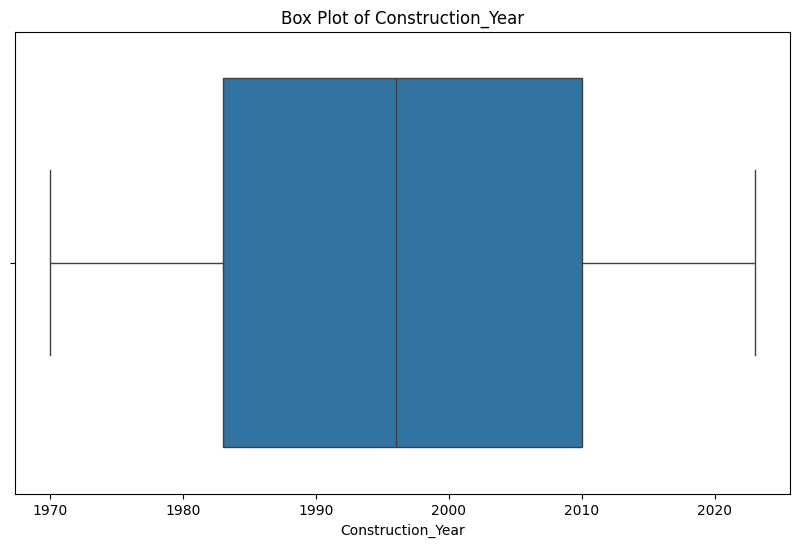

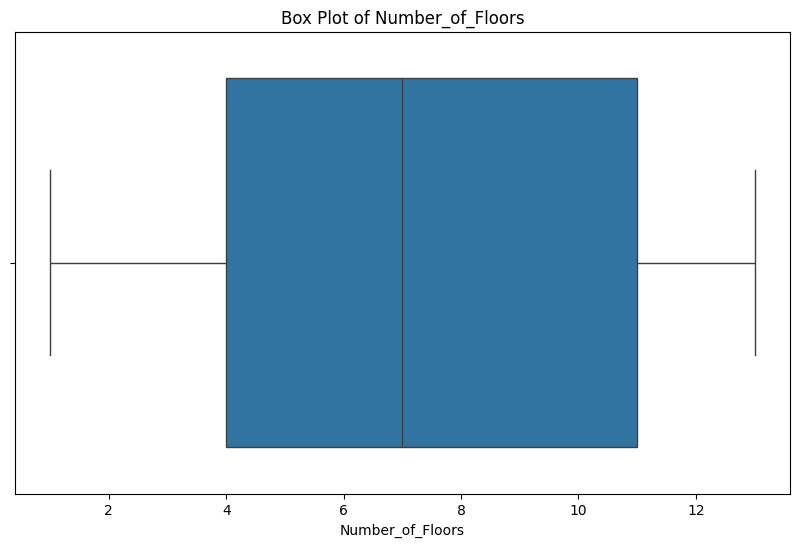

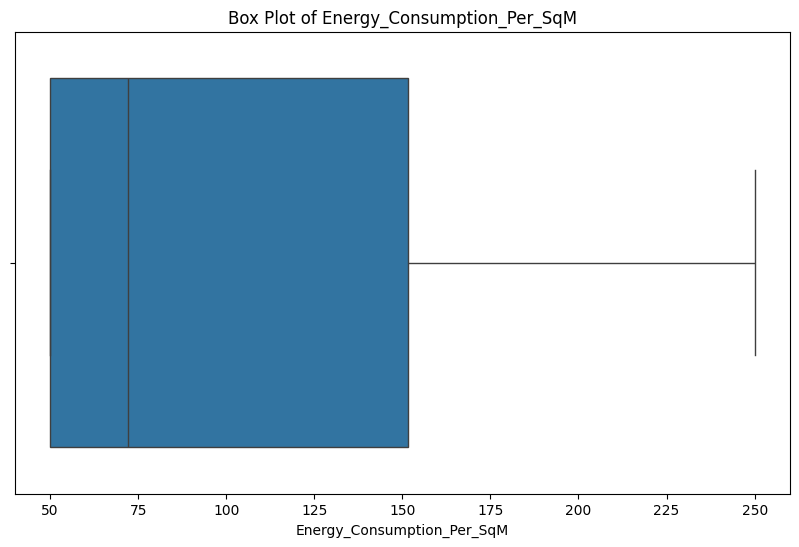

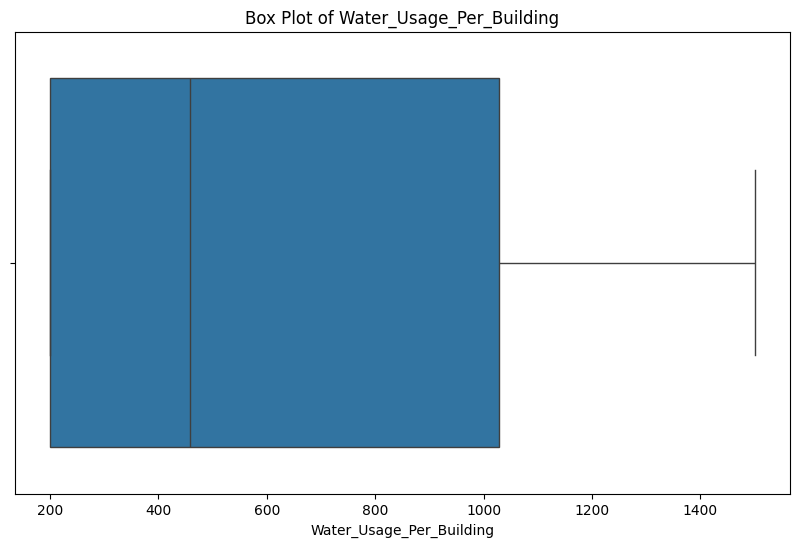

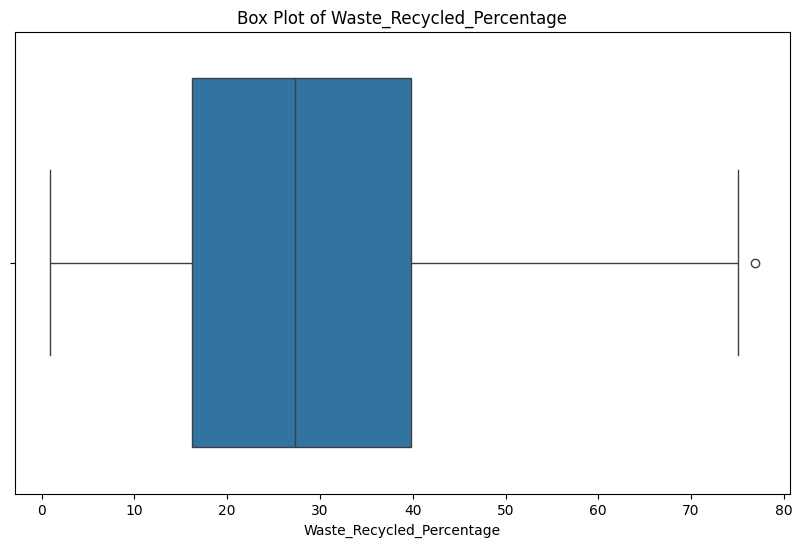

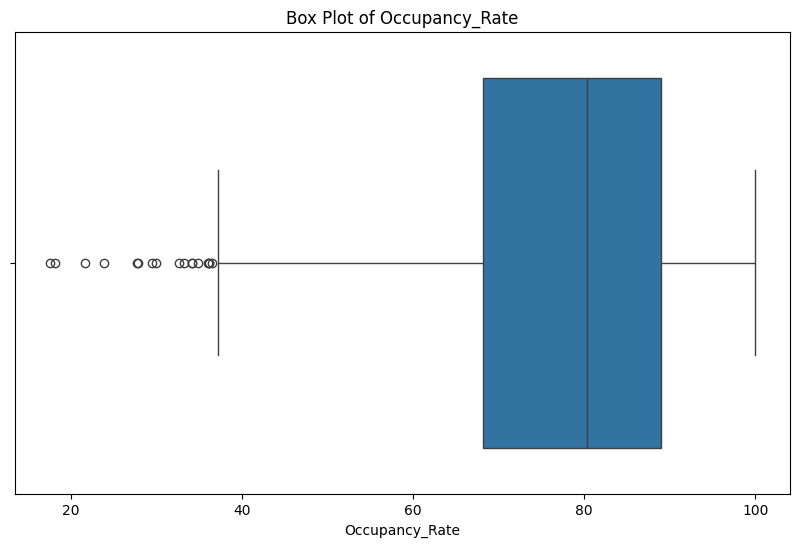

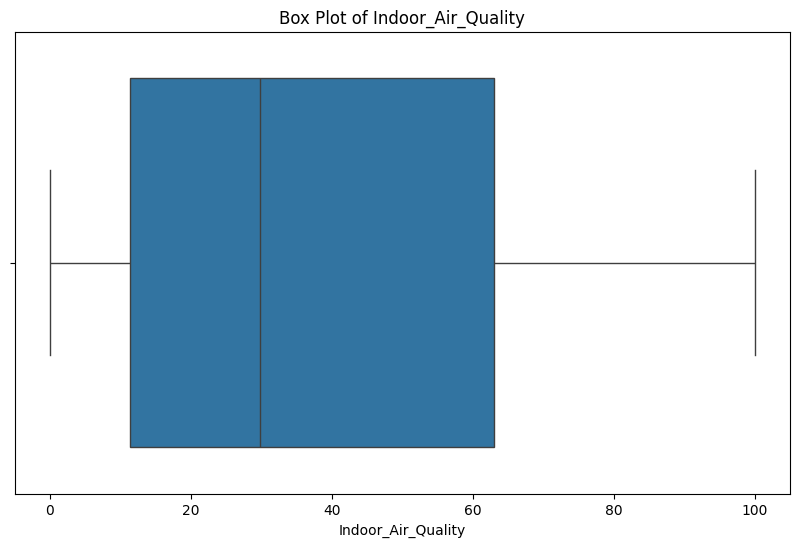

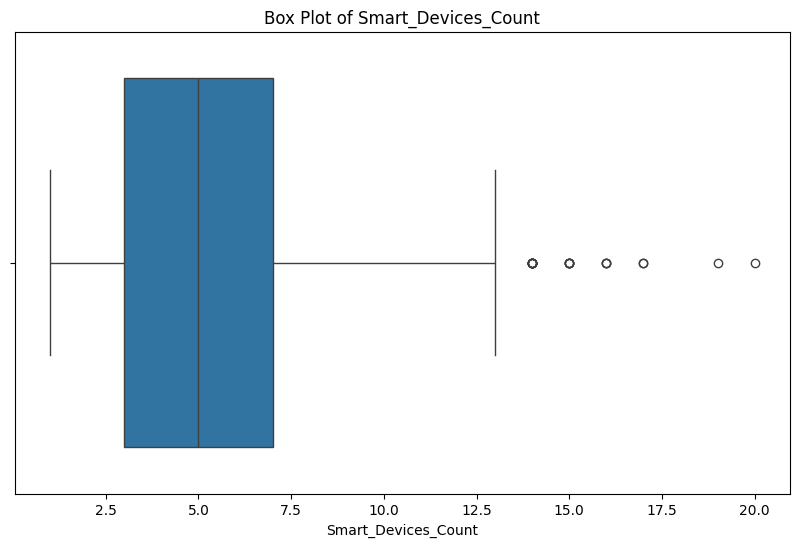

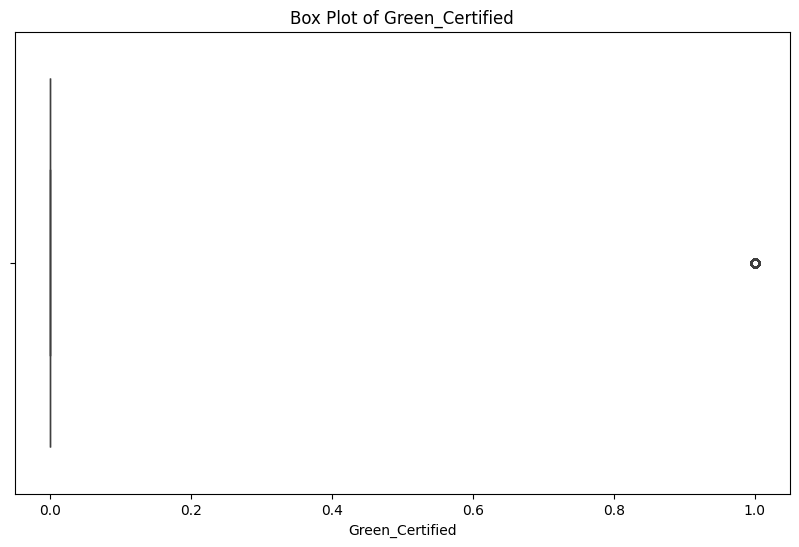

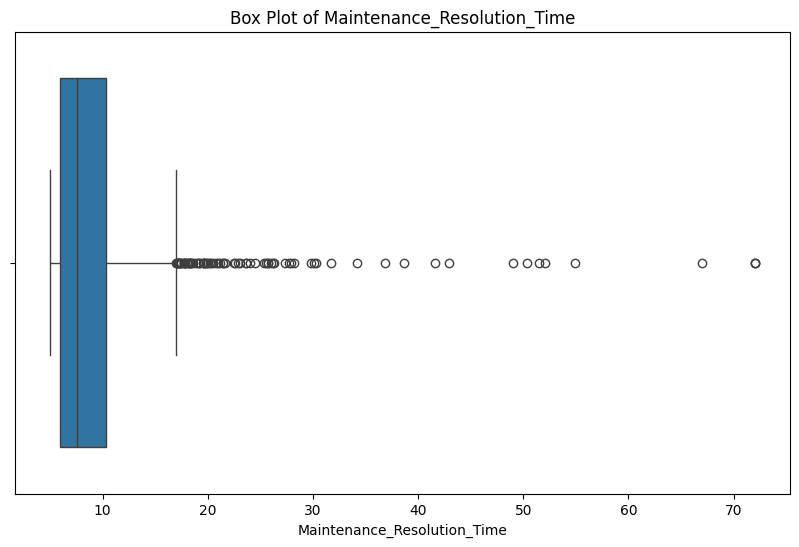

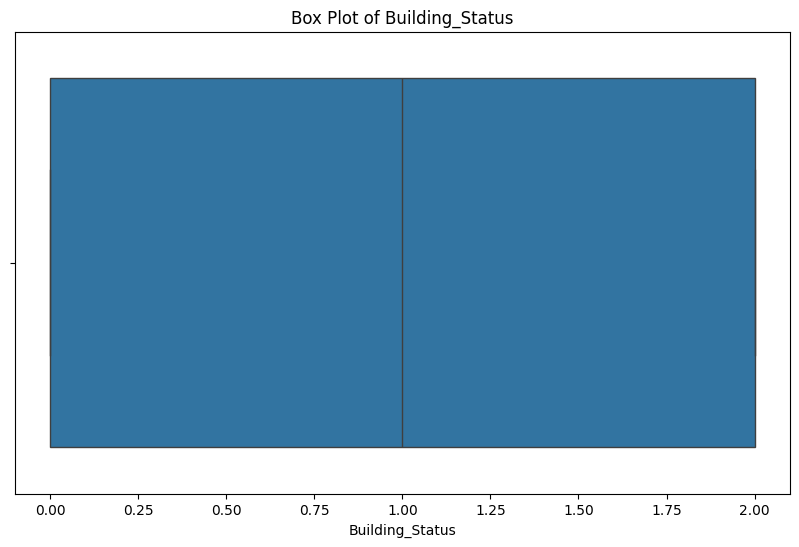

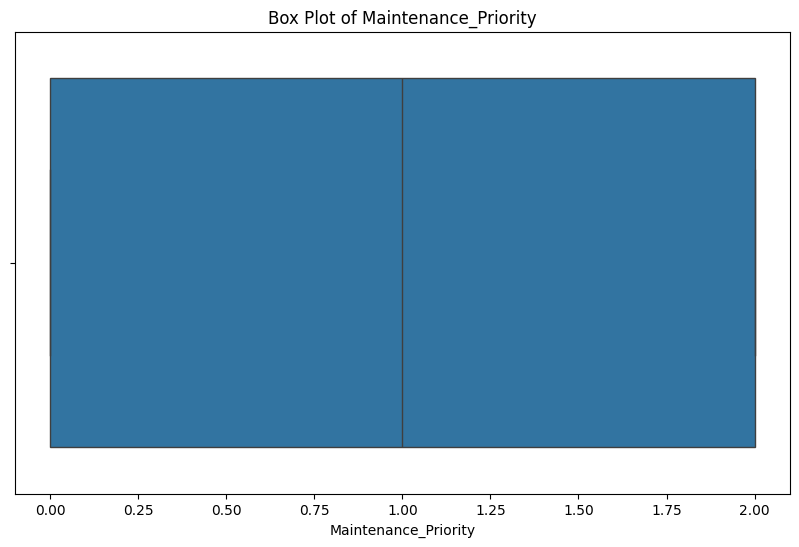

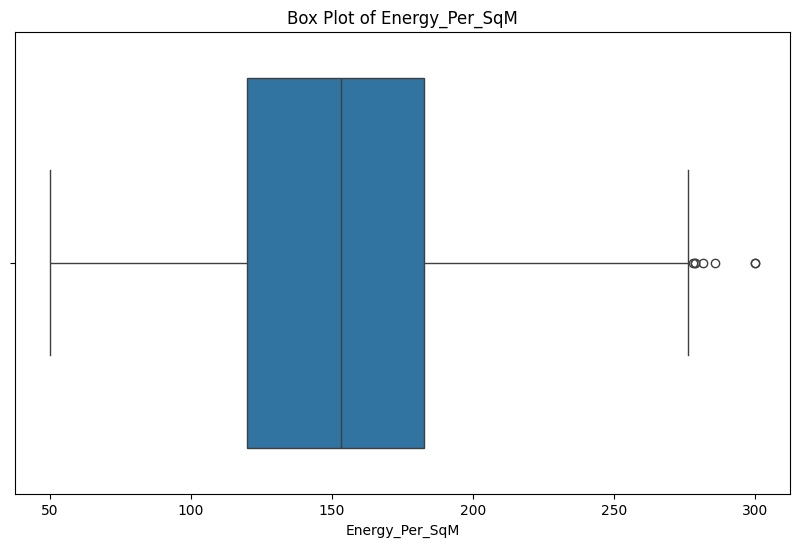

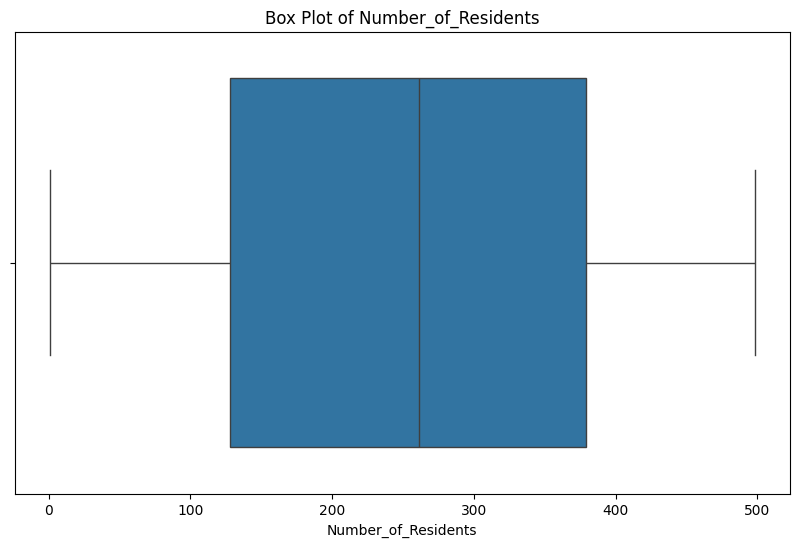

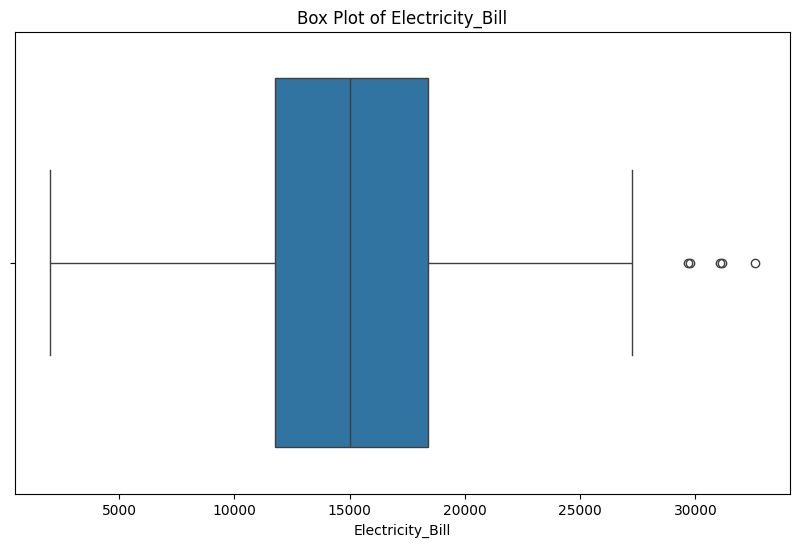

In [ ]:
num_features = train_df.select_dtypes(include=['float64', 'int64']).columns

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

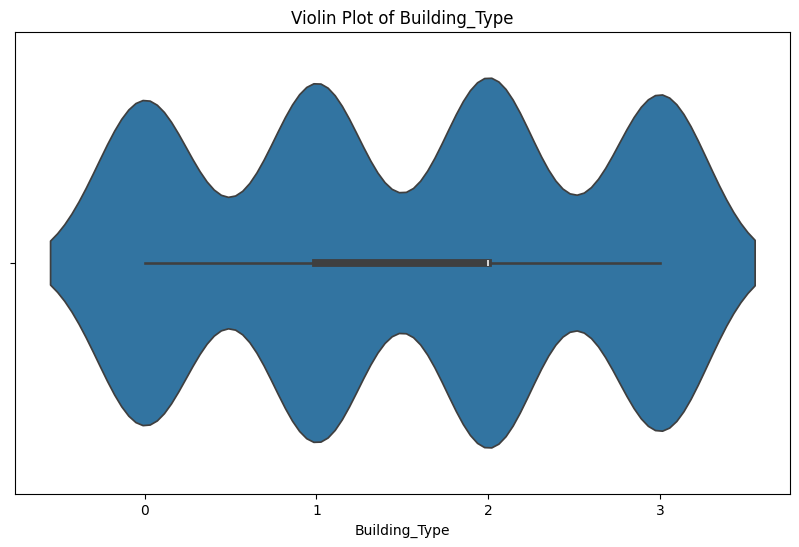

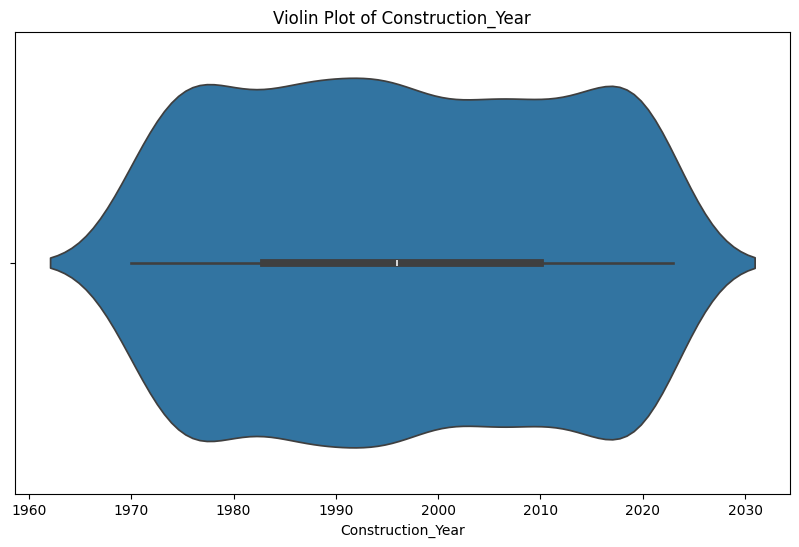

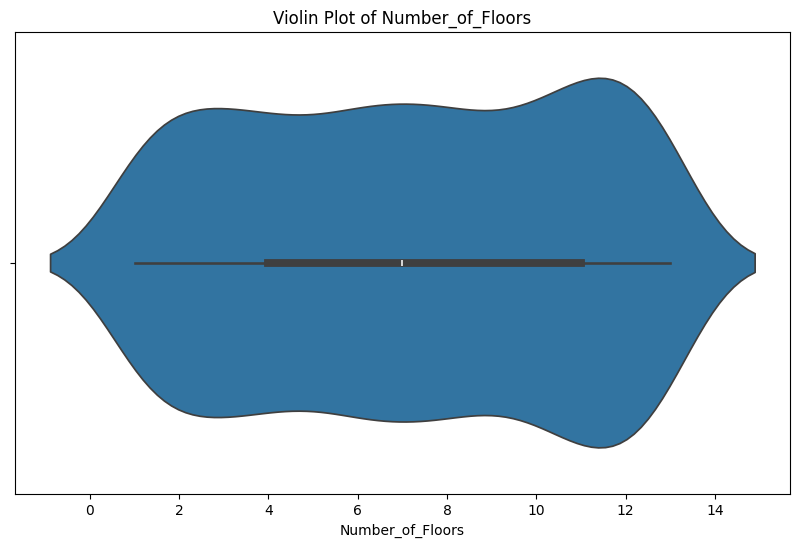

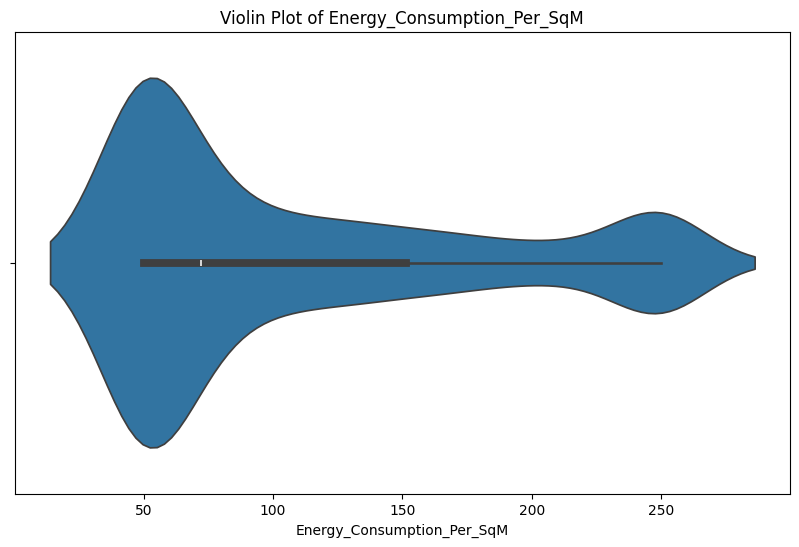

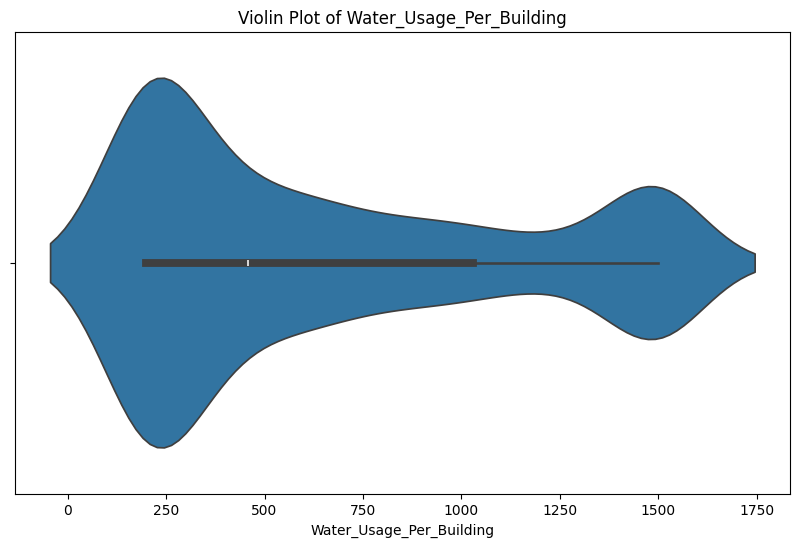

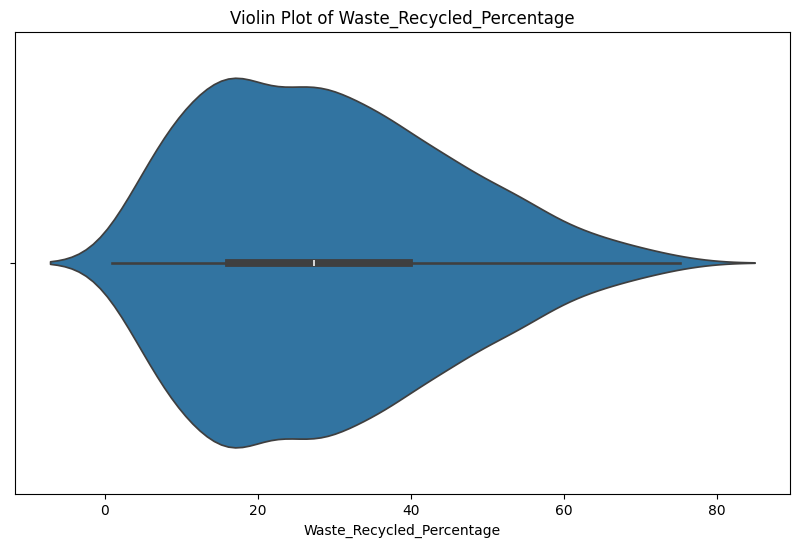

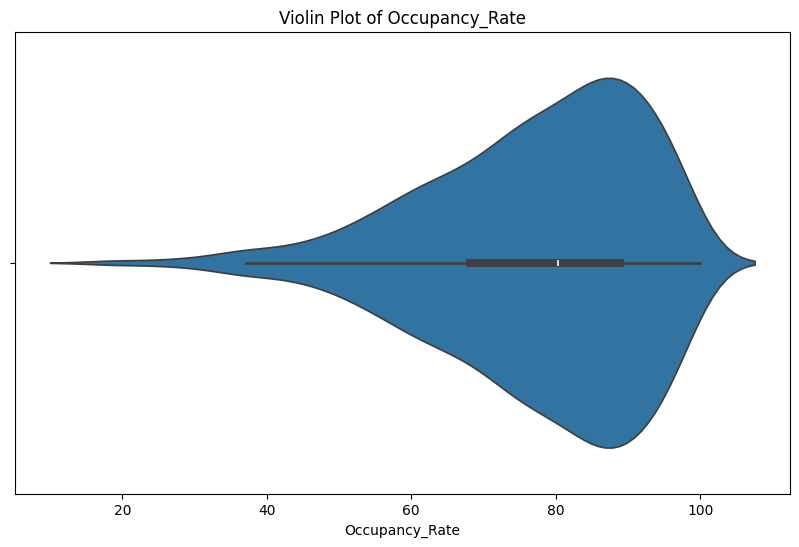

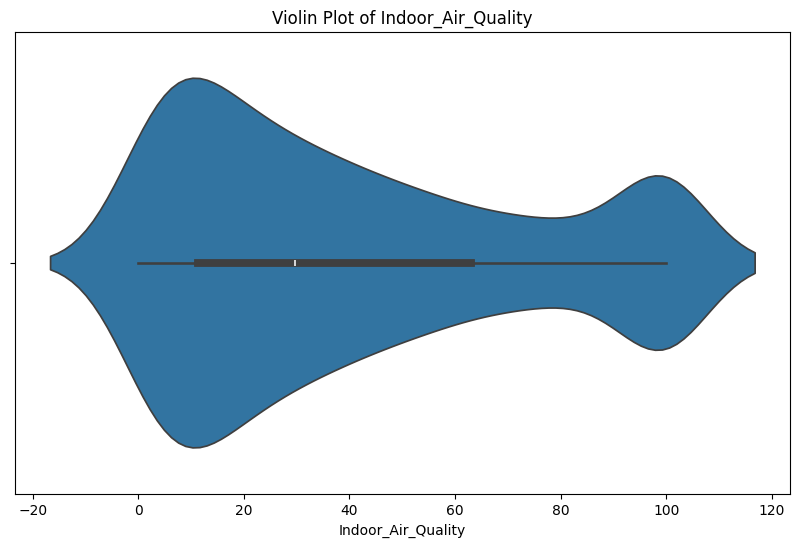

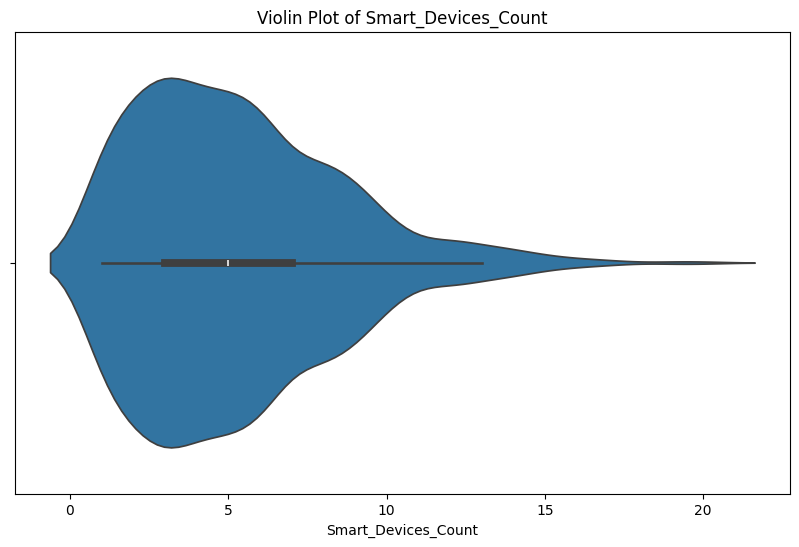

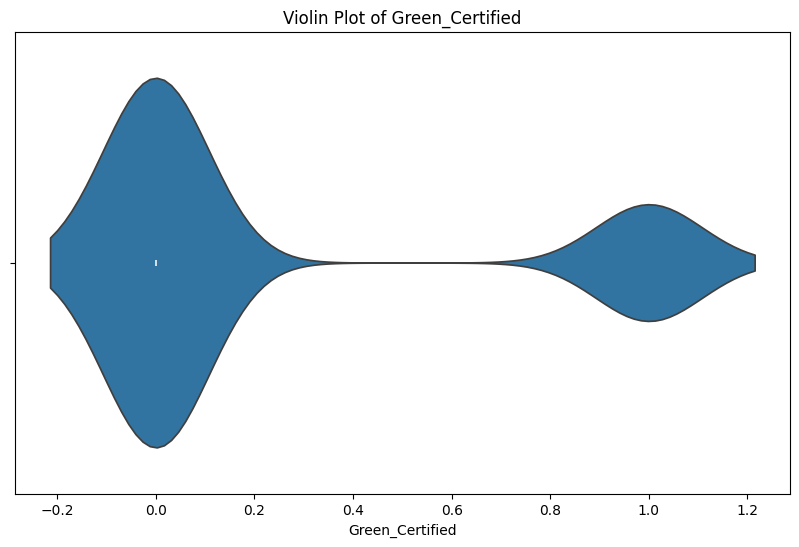

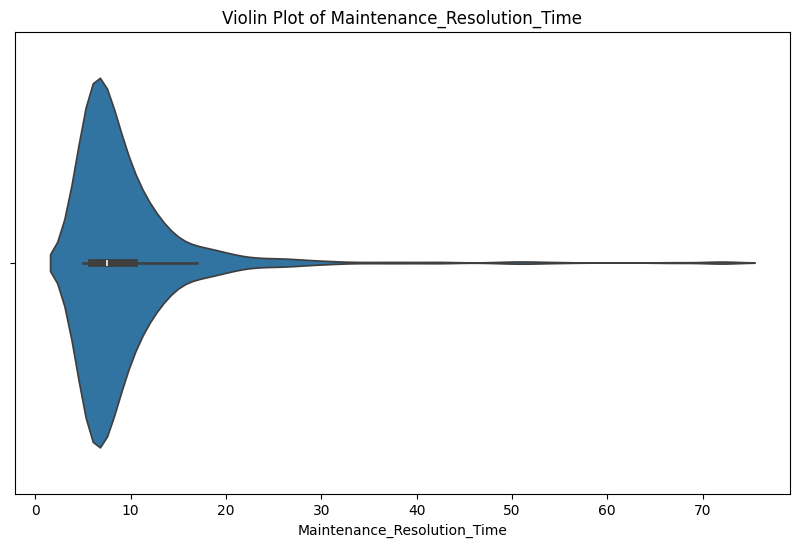

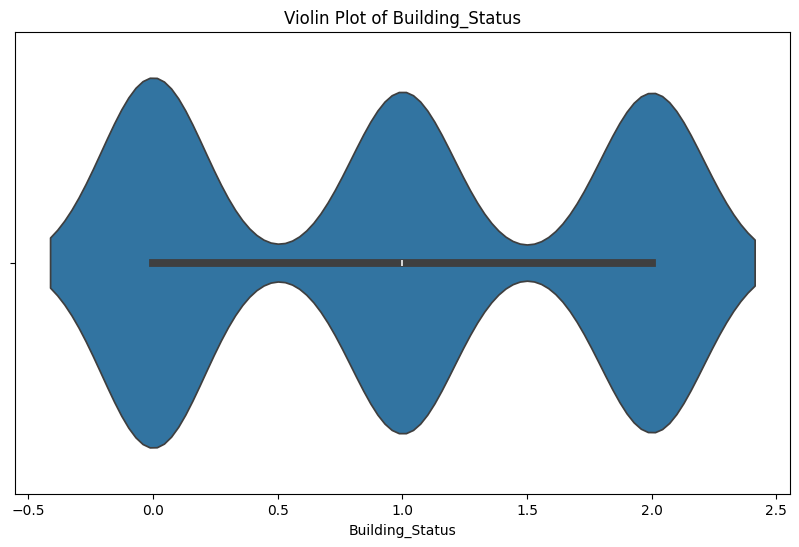

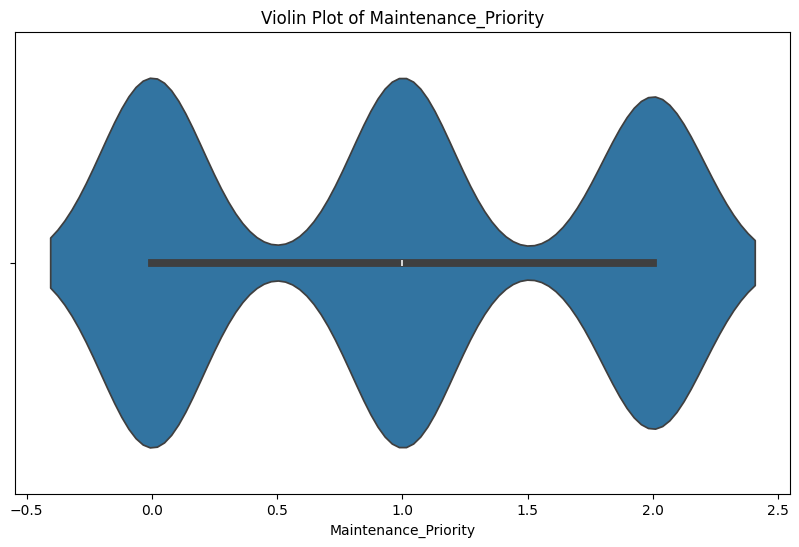

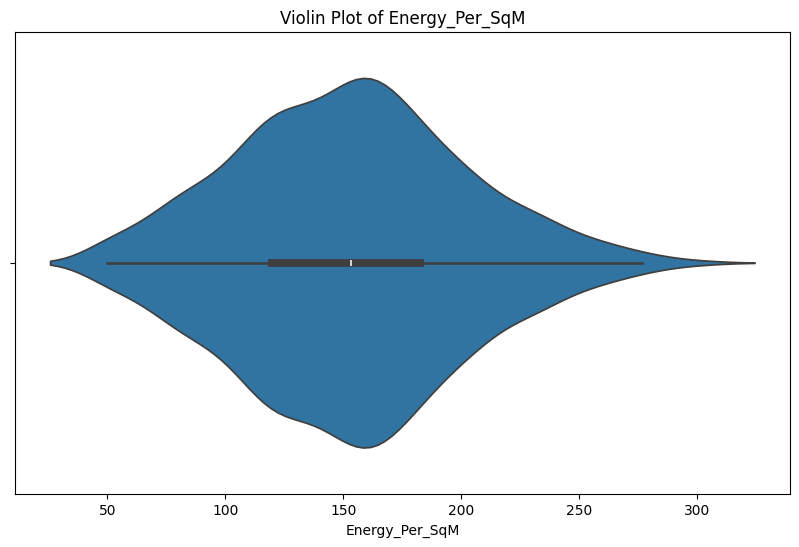

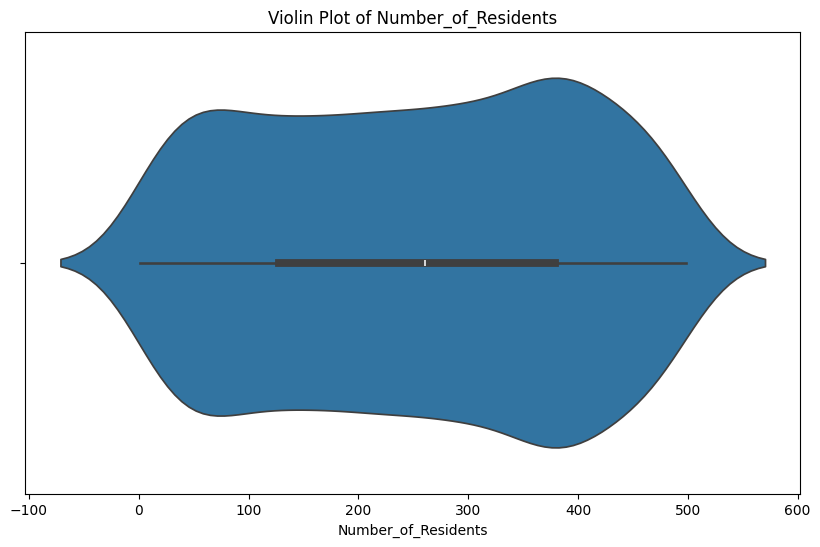

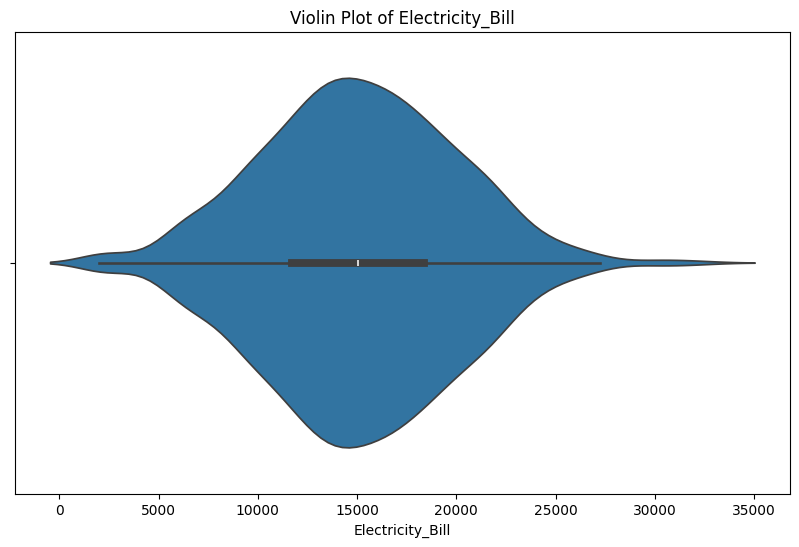

In [ ]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=train_df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.show()


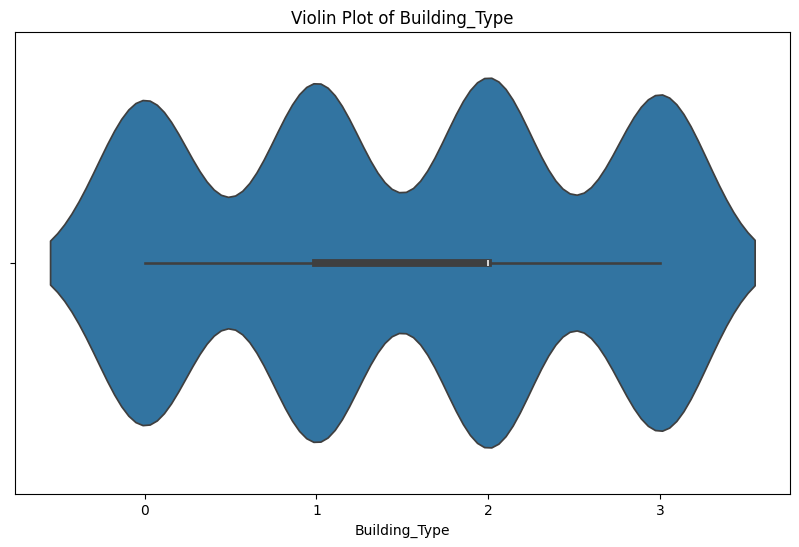

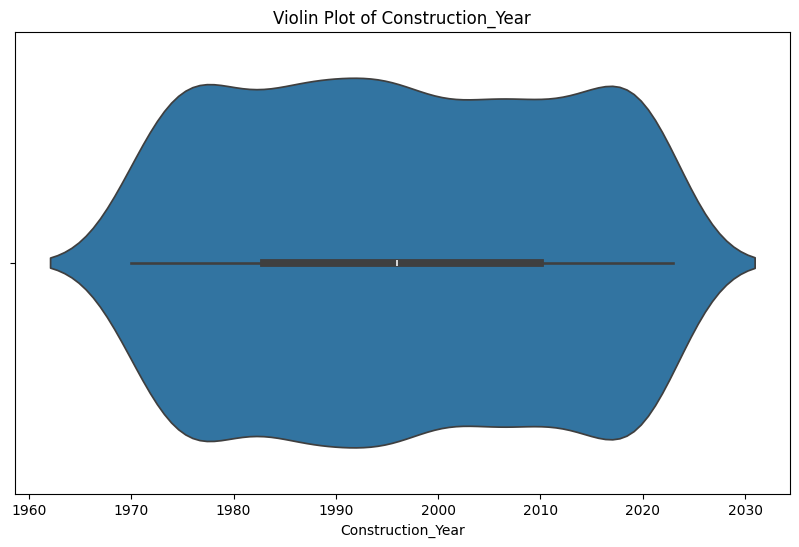

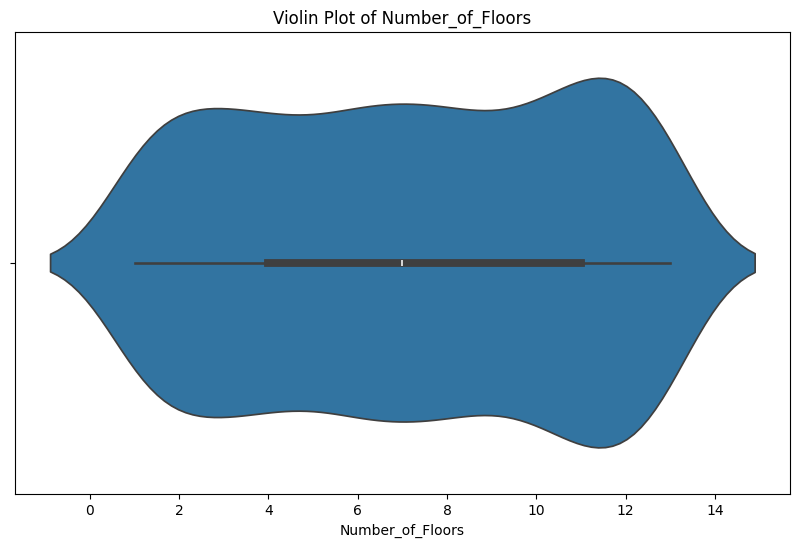

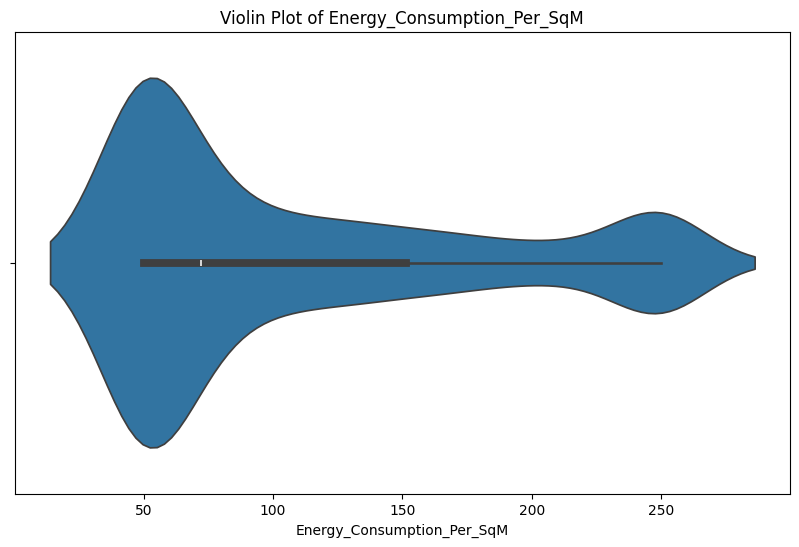

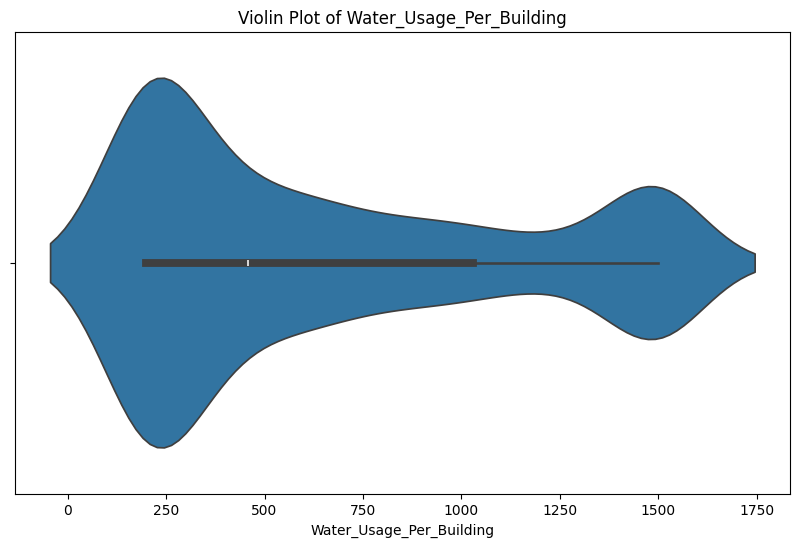

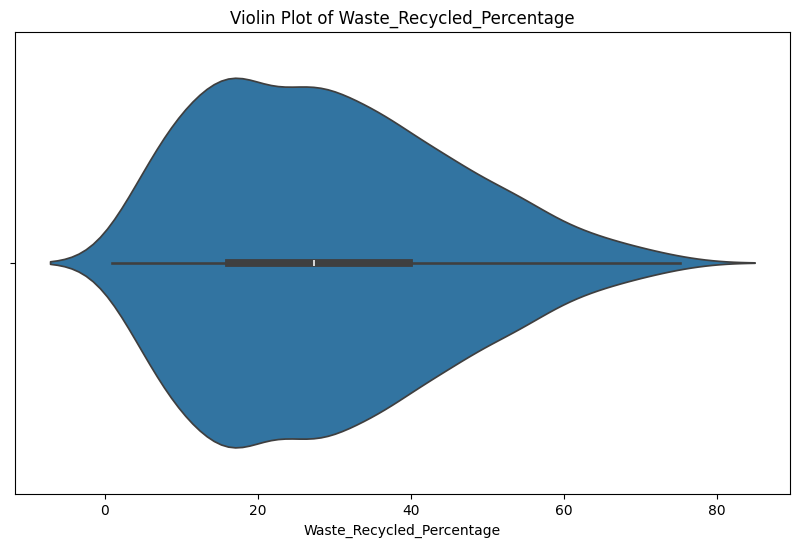

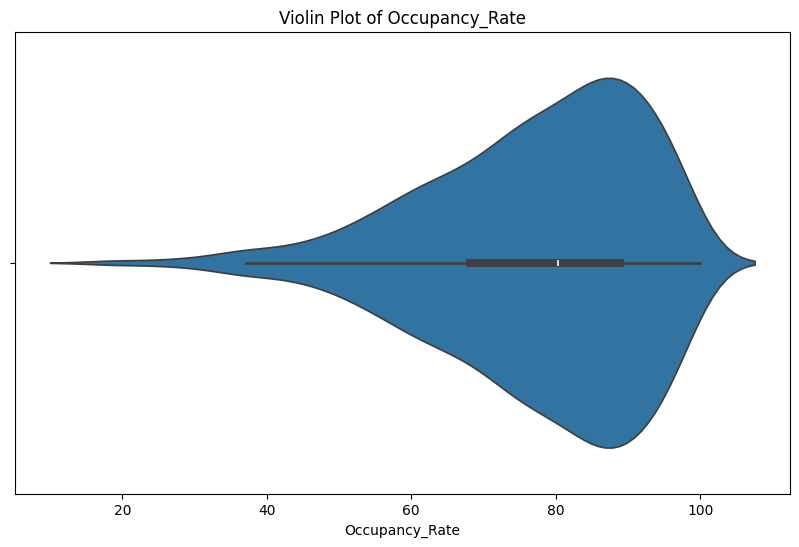

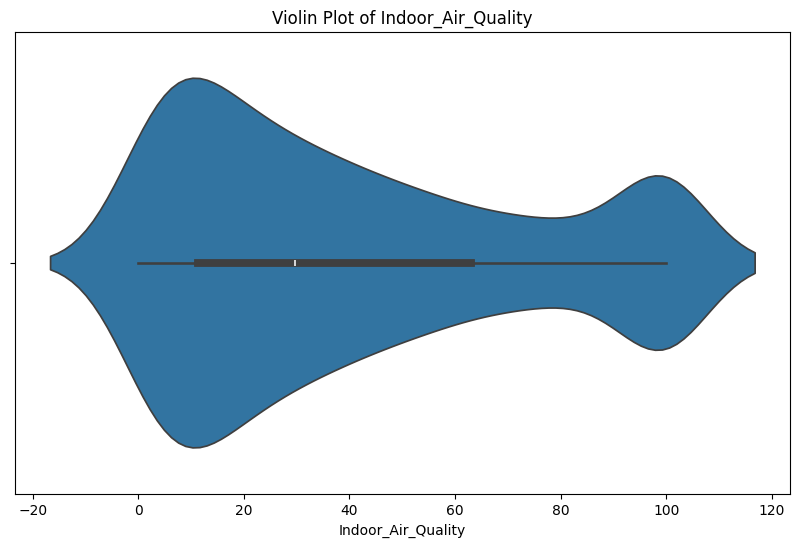

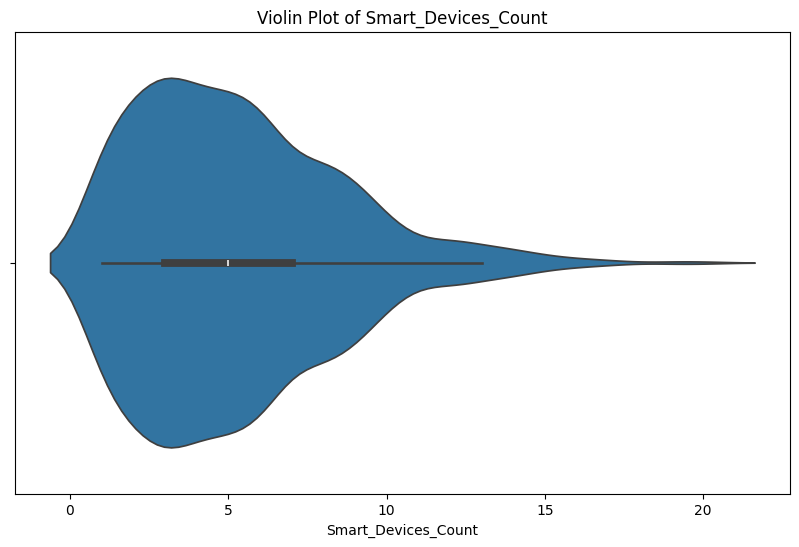

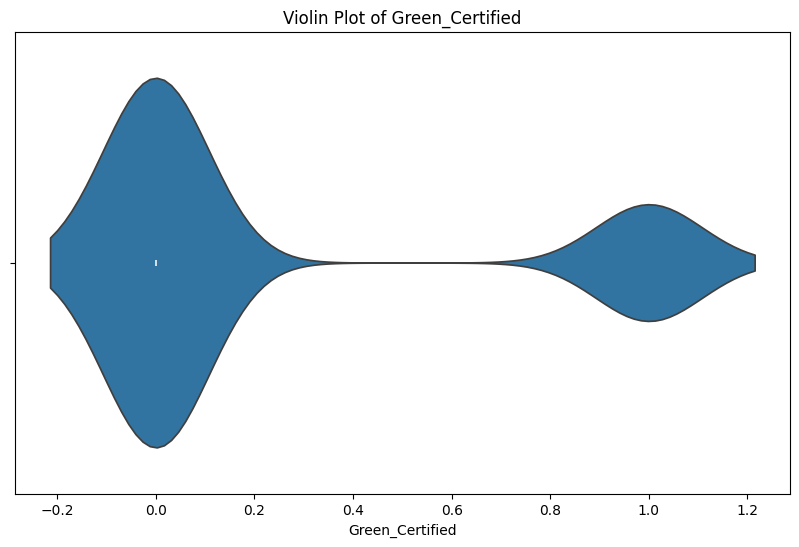

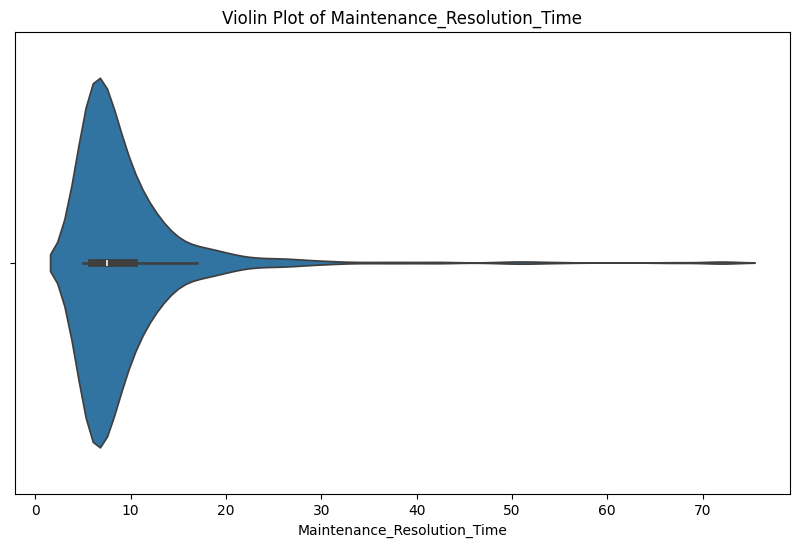

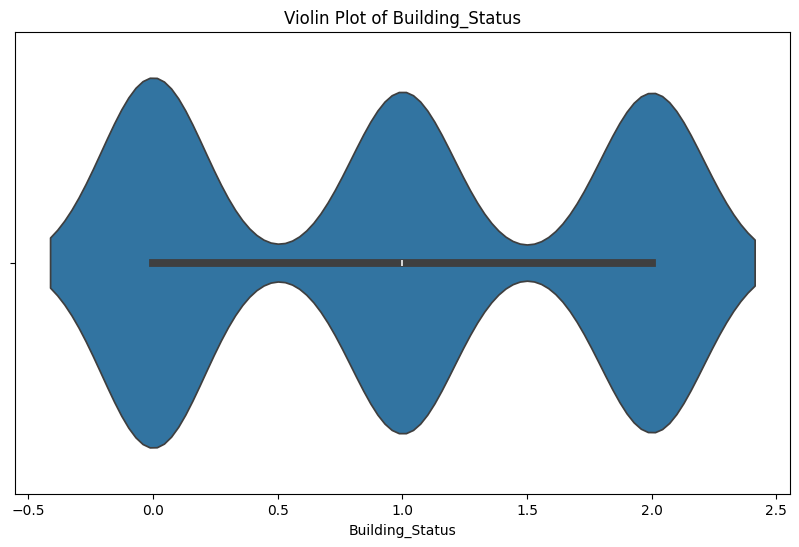

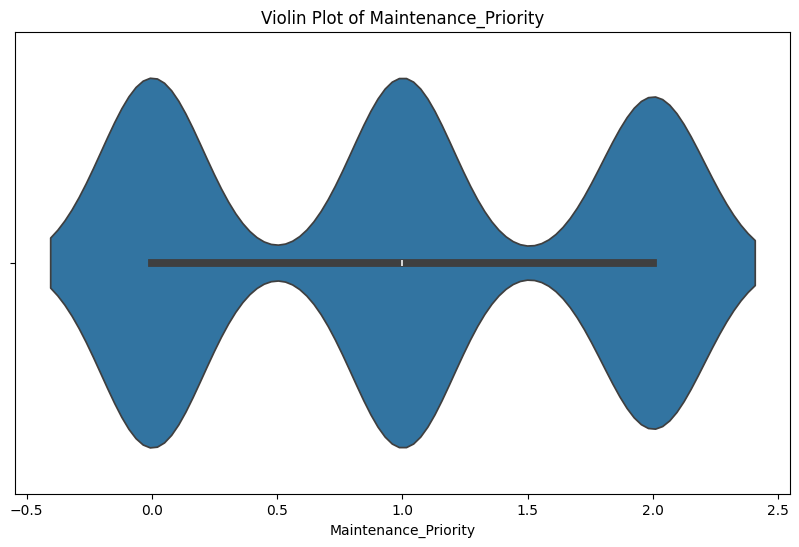

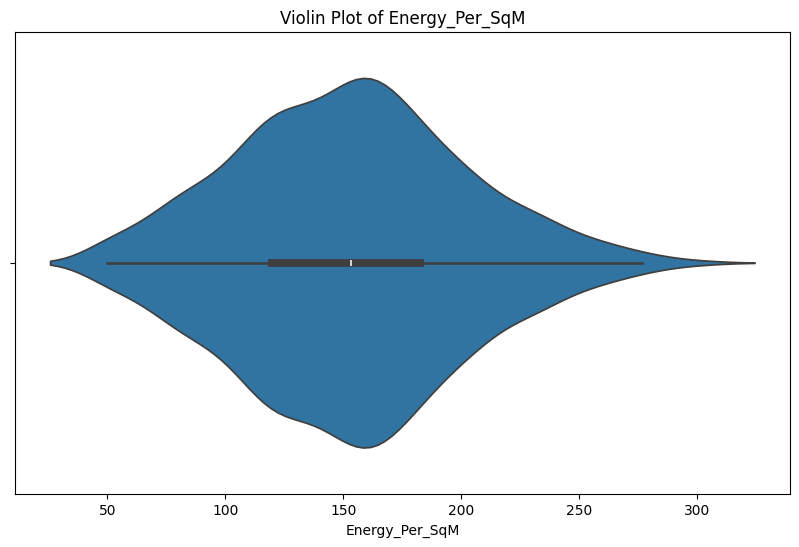

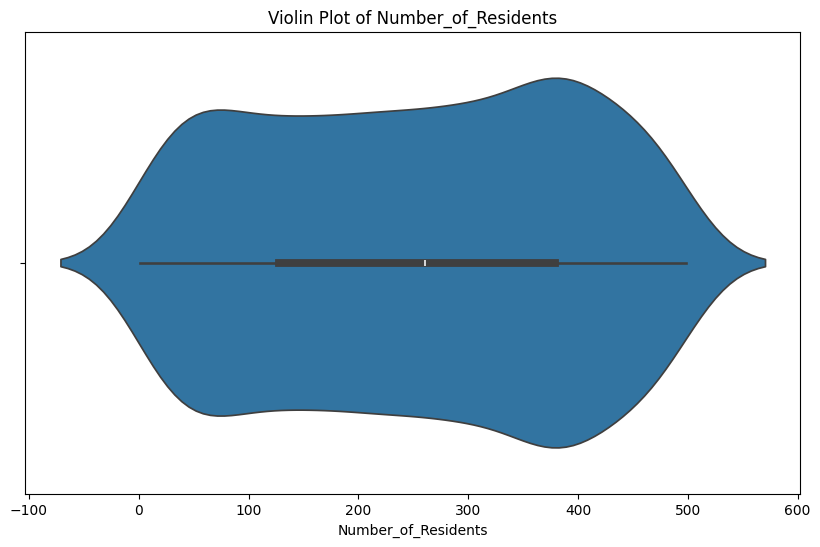

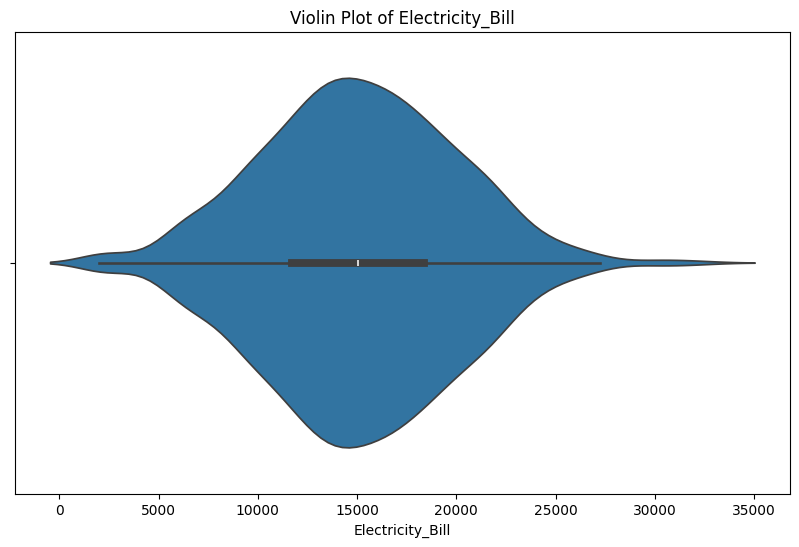

In [ ]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=train_df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.show()


In [ ]:
cat_features = train_df.select_dtypes(include=['object']).columns

for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=train_df[feature])
    plt.title(f'Count Plot of {feature}')
    plt.show()


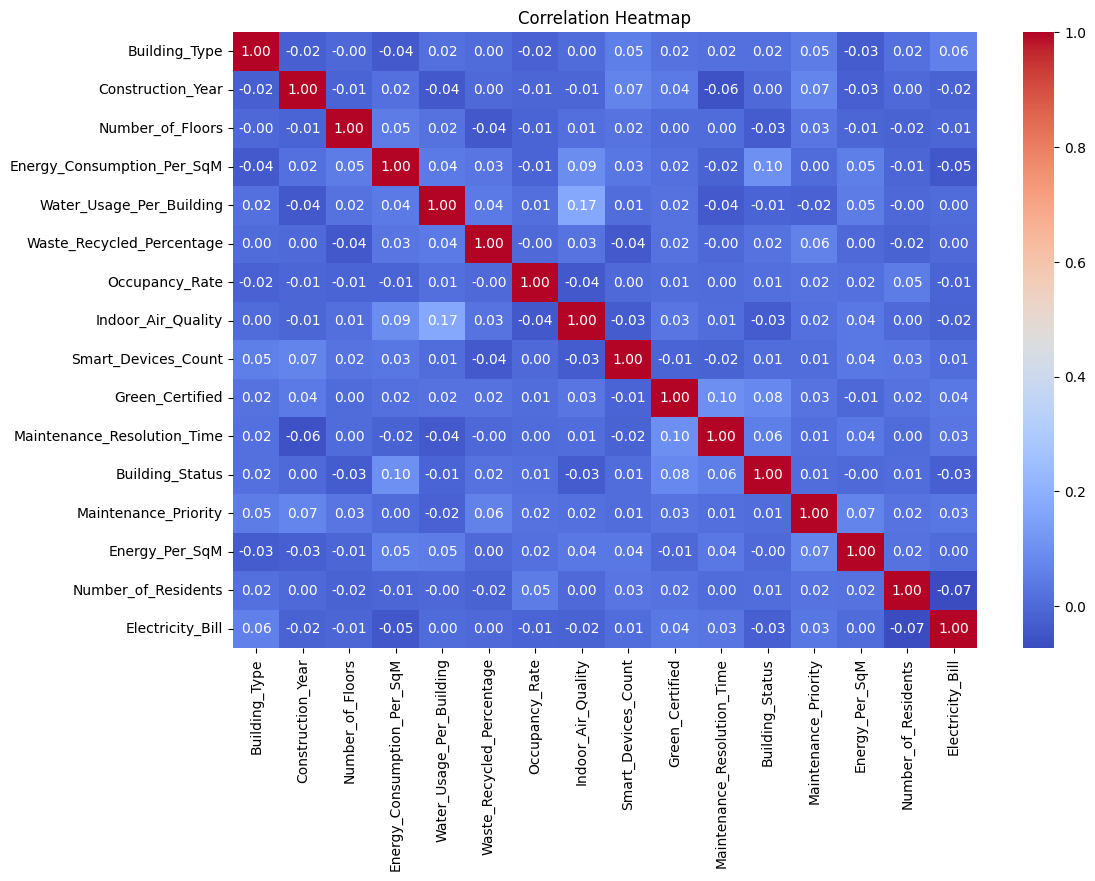

In [ ]:

num_features = train_df.select_dtypes(include=['float64', 'int64']).columns

corr = train_df[num_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 680 to 1126
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   int64  
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   int64  
 12  Maintenance_Priority         1250 non-null   int64  
 13  Energy_Per_SqM       

In [ ]:
print(data.isnull().sum())
data = data.dropna()


Building_Type                  0
Construction_Year              0
Number_of_Floors               0
Energy_Consumption_Per_SqM     0
Water_Usage_Per_Building       0
Waste_Recycled_Percentage      0
Occupancy_Rate                 0
Indoor_Air_Quality             0
Smart_Devices_Count            0
Green_Certified                0
Maintenance_Resolution_Time    0
Building_Status                0
Maintenance_Priority           0
Energy_Per_SqM                 0
Number_of_Residents            0
Electricity_Bill               0
dtype: int64


In [ ]:
print(train_df)

      Building_Type  Construction_Year  Number_of_Floors  \
205               1               2020                 1   
320               1               2013                 8   
336               1               2010                13   
846               2               1997                 3   
810               0               1997                 2   
...             ...                ...               ...   
1181              1               1994                 9   
698               0               1978                 1   
392               2               1989                12   
986               0               1971                10   
863               1               1970                 8   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
205                    50.000000                801.871652   
320                    59.759299                265.008031   
336                   145.065227                356.375269   
846                    50.00000

In [ ]:
from sklearn.impute import SimpleImputer
features = train_df.drop(columns=['Electricity_Bill'])
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


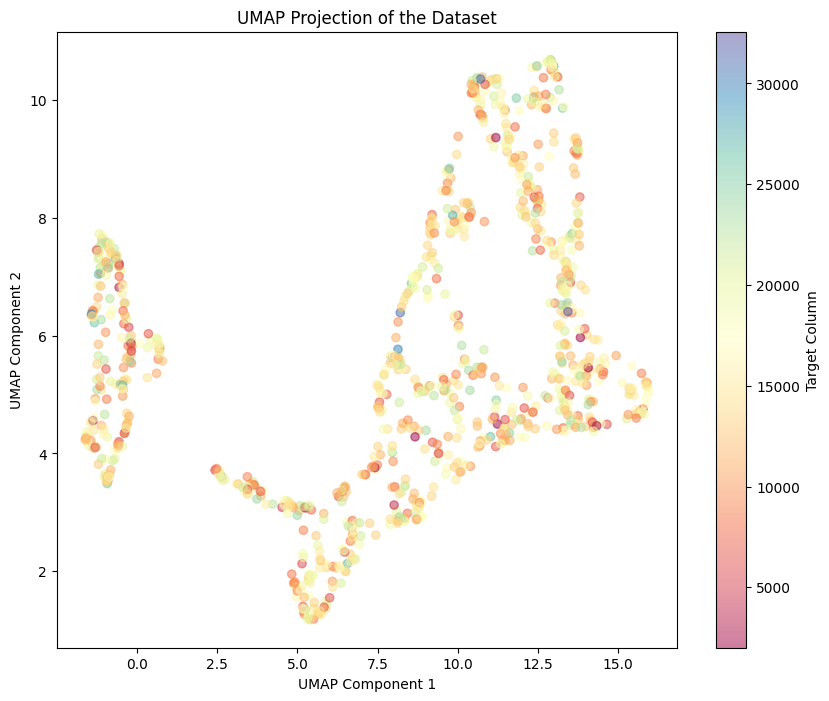

In [ ]:
import umap


umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

plt.figure(figsize=(10, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], alpha=0.5, c=train_df['Electricity_Bill'], cmap='Spectral')
plt.colorbar(label='Target Column')
plt.title('UMAP Projection of the Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
file_path = '/content/Electricity BILL.csv'
data = pd.read_csv(file_path)

In [ ]:
target_column = 'Electricity_Bill'
features = data.drop(columns=[target_column])

In [ ]:

categorical_features = ['Building_Type','Building_Status','Maintenance_Priority']
numerical_features=['Construction_Year','Number_of_Floors','Energy_Consumption_Per_SqM','Water_Usage_Per_Building','Waste_Recycled_Percentage','Occupancy_Rate','Indoor_Air_Quality','Smart_Devices_Count','Green_Certified','Maintenance_Resolution_Time','Energy_Per_SqM','Number_of_Residents']


In [ ]:
num_imputer = SimpleImputer(strategy='mean')
features[numerical_features] = num_imputer.fit_transform(features[numerical_features])


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
features[categorical_features] = cat_imputer.fit_transform(features[categorical_features])


In [ ]:
label_encoders = {}
for cat_feature in categorical_features:
    le = LabelEncoder()
    features[cat_feature] = le.fit_transform(features[cat_feature])
    label_encoders[cat_feature] = le


In [ ]:
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])


In [ ]:
X = features
y = data[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])

In [ ]:
print("Training Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"Adjusted R2 Score: {adj_r2_train:.4f}")

print("\nTesting Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")
print(f"Adjusted R2 Score: {adj_r2_test:.4f}")

Training Metrics:
Mean Squared Error (MSE): 24475013.1685
Root Mean Squared Error (RMSE): 4947.2228
Mean Absolute Error (MAE): 4006.3285
R2 Score: 0.0139
Adjusted R2 Score: -0.0011

Testing Metrics:
Mean Squared Error (MSE): 24278016.1557
Root Mean Squared Error (RMSE): 4927.2727
Mean Absolute Error (MAE): 3842.4093
R2 Score: 0.0000
Adjusted R2 Score: -0.0641


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = '/content/Electricity BILL.csv'
data = pd.read_csv(file_path)

target_column = 'Electricity_Bill'
features = data.drop(columns=[target_column])
target = data[target_column]


In [ ]:
num_imputer = SimpleImputer(strategy='mean')
features[numerical_features] = num_imputer.fit_transform(features[numerical_features])
cat_imputer = SimpleImputer(strategy='most_frequent')
features[categorical_features] = cat_imputer.fit_transform(features[categorical_features])
label_encoders = {}
for cat_feature in categorical_features:
    le = LabelEncoder()
    features[cat_feature] = le.fit_transform(features[cat_feature])
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

X = features.to_numpy()
y = target.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

selected_features = np.where(rfe.support_)[0]
print(f"Selected features indices: {selected_features}")

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

model.fit(X_train_selected, y_train)
y_train_pred_selected = model.predict(X_train_selected)
y_test_pred_selected = model.predict(X_test_selected)

Selected features indices: [ 0  9 14]


In [ ]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


In [ ]:
mse_train_rfe = mean_squared_error(y_train, y_train_pred_selected)
rmse_train_rfe = np.sqrt(mse_train_rfe)
mae_train_rfe = mean_absolute_error(y_train, y_train_pred_selected)
r2_train_rfe = r2_score(y_train, y_train_pred_selected)
adj_r2_train_rfe = adjusted_r2_score(r2_train_rfe, X_train_selected.shape[0], X_train_selected.shape[1])


In [ ]:
mse_test_rfe = mean_squared_error(y_test, y_test_pred_selected)
rmse_test_rfe = np.sqrt(mse_test_rfe)
mae_test_rfe = mean_absolute_error(y_test, y_test_pred_selected)
r2_test_rfe = r2_score(y_test, y_test_pred_selected)
adj_r2_test_rfe = adjusted_r2_score(r2_test_rfe, X_test_selected.shape[0], X_test_selected.shape[1])

In [ ]:
print("RFE Selected Features Training Metrics:")
print(f"Mean Squared Error (MSE): {mse_train_rfe:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rfe:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rfe:.4f}")
print(f"R2 Score: {r2_train_rfe:.4f}")
print(f"Adjusted R2 Score: {adj_r2_train_rfe:.4f}")

RFE Selected Features Training Metrics:
Mean Squared Error (MSE): 24569032.9069
Root Mean Squared Error (RMSE): 4956.7159
Mean Absolute Error (MAE): 4006.4734
R2 Score: 0.0101
Adjusted R2 Score: 0.0072


In [ ]:
print("\nRFE Selected Features Testing Metrics:")
print(f"Mean Squared Error (MSE): {mse_test_rfe:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rfe:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_rfe:.4f}")
print(f"R2 Score: {r2_test_rfe:.4f}")
print(f"Adjusted R2 Score: {adj_r2_test_rfe:.4f}")



RFE Selected Features Testing Metrics:
Mean Squared Error (MSE): 23941409.0630
Root Mean Squared Error (RMSE): 4892.9959
Mean Absolute Error (MAE): 3813.9481
R2 Score: 0.0139
Adjusted R2 Score: 0.0019


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
target_column = 'Electricity_Bill'
features = data.drop(columns=[target_column])
target = data[target_column]

num_features = ['Construction_Year', 'Number_of_Floors']
cat_features = ['Building_Type']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])


In [ ]:

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])


In [ ]:
print("Training Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"Adjusted R2 Score: {adj_r2_train:.4f}")

Training Metrics:
Mean Squared Error (MSE): 24532743.7346
Root Mean Squared Error (RMSE): 4953.0540
Mean Absolute Error (MAE): 3972.1778
R2 Score: 0.0116
Adjusted R2 Score: -0.0035


In [ ]:
print("\nTesting Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")
print(f"Adjusted R2 Score: {adj_r2_test:.4f}")



Testing Metrics:
Mean Squared Error (MSE): 24161960.4860
Root Mean Squared Error (RMSE): 4915.4817
Mean Absolute Error (MAE): 3789.6147
R2 Score: 0.0048
Adjusted R2 Score: -0.0590


In [ ]:

def evaluate_ica_components(n_components_list, X_train, X_test, y_train, y_test):
    results = {}
    for n_components in n_components_list:
        print(f"Evaluating ICA with {n_components} components...")

        ica = FastICA(n_components=n_components, random_state=42)
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('ica', ica),
            ('regressor', Ridge())
        ])

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        def adjusted_r2_score(r2, n, p):
            return 1 - (1 - r2) * (n - 1) / (n - p - 1)

        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], n_components)

        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], n_components)

        results[n_components] = {
            'mse_train': mse_train,
            'rmse_train': rmse_train,
            'mae_train': mae_train,
            'r2_train': r2_train,
            'adj_r2_train': adj_r2_train,
            'mse_test': mse_test,
            'rmse_test': rmse_test,
            'mae_test': mae_test,
            'r2_test': r2_test,
            'adj_r2_test': adj_r2_test
        }

    return results

In [ ]:




n_components_list = [4, 5, 6, 8]
results = evaluate_ica_components(n_components_list, X_train, X_test, y_train, y_test)

for n_components, metrics in results.items():
    print(f"\nICA with {n_components} Components:")
    print(f"Training Metrics:")
    print(f"Mean Squared Error (MSE): {metrics['mse_train']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['rmse_train']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['mae_train']:.4f}")
    print(f"R2 Score: {metrics['r2_train']:.4f}")
    print(f"Adjusted R2 Score: {metrics['adj_r2_train']:.4f}")




Evaluating ICA with 4 components...
Evaluating ICA with 5 components...
Evaluating ICA with 6 components...
Evaluating ICA with 8 components...

ICA with 4 Components:
Training Metrics:
Mean Squared Error (MSE): 24710672.5758
Root Mean Squared Error (RMSE): 4970.9831
Mean Absolute Error (MAE): 4000.1591
R2 Score: 0.0044
Adjusted R2 Score: 0.0004

ICA with 5 Components:
Training Metrics:
Mean Squared Error (MSE): 24532739.4669
Root Mean Squared Error (RMSE): 4953.0535
Mean Absolute Error (MAE): 3972.1414
R2 Score: 0.0116
Adjusted R2 Score: 0.0066

ICA with 6 Components:
Training Metrics:
Mean Squared Error (MSE): 24802891.4848
Root Mean Squared Error (RMSE): 4980.2501
Mean Absolute Error (MAE): 3995.7457
R2 Score: 0.0007
Adjusted R2 Score: -0.0053

ICA with 8 Components:
Training Metrics:
Mean Squared Error (MSE): 24802891.4848
Root Mean Squared Error (RMSE): 4980.2501
Mean Absolute Error (MAE): 3995.7457
R2 Score: 0.0007
Adjusted R2 Score: -0.0074


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:582: UserWarning: n_components is too large: it will be set to 6
  warnings.warn(


In [ ]:
    print(f"\nTesting Metrics:")
    print(f"Mean Squared Error (MSE): {metrics['mse_test']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['rmse_test']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['mae_test']:.4f}")
    print(f"R2 Score: {metrics['r2_test']:.4f}")
    print(f"Adjusted R2 Score: {metrics['adj_r2_test']:.4f}")


Testing Metrics:
Mean Squared Error (MSE): 24563555.7383
Root Mean Squared Error (RMSE): 4956.1634
Mean Absolute Error (MAE): 3864.7253
R2 Score: -0.0117
Adjusted R2 Score: -0.0453


In [ ]:
def evaluate_elasticnet_l1_ratios(l1_ratios, X_train, X_test, y_train, y_test):
    results = {}
    for l1_ratio in l1_ratios:
        print(f"Evaluating ElasticNet with l1_ratio={l1_ratio}...")

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', ElasticNet(l1_ratio=l1_ratio, random_state=42))
        ])

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        def adjusted_r2_score(r2, n, p):
            return 1 - (1 - r2) * (n - 1) / (n - p - 1)

        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])

        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])

        results[l1_ratio] = {
            'mse_train': mse_train,
            'rmse_train': rmse_train,
            'mae_train': mae_train,
            'r2_train': r2_train,
            'adj_r2_train': adj_r2_train,
            'mse_test': mse_test,
            'rmse_test': rmse_test,
            'mae_test': mae_test,
            'r2_test': r2_test,
            'adj_r2_test': adj_r2_test
        }

    return results

In [ ]:
from sklearn.linear_model import ElasticNet
l1_ratios = [0.1, 0.5, 0.9]
results = evaluate_elasticnet_l1_ratios(l1_ratios, X_train, X_test, y_train, y_test)

Evaluating ElasticNet with l1_ratio=0.1...
Evaluating ElasticNet with l1_ratio=0.5...
Evaluating ElasticNet with l1_ratio=0.9...


In [ ]:
for l1_ratio, metrics in results.items():
    print(f"\nElasticNet with l1_ratio={l1_ratio}:")
    print(f"Training Metrics:")
    print(f"Mean Squared Error (MSE): {metrics['mse_train']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['rmse_train']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['mae_train']:.4f}")
    print(f"R2 Score: {metrics['r2_train']:.4f}")
    print(f"Adjusted R2 Score: {metrics['adj_r2_train']:.4f}")



ElasticNet with l1_ratio=0.1:
Training Metrics:
Mean Squared Error (MSE): 24705592.8392
Root Mean Squared Error (RMSE): 4970.4721
Mean Absolute Error (MAE): 3996.9040
R2 Score: 0.0046
Adjusted R2 Score: -0.0105

ElasticNet with l1_ratio=0.5:
Training Metrics:
Mean Squared Error (MSE): 24658474.3535
Root Mean Squared Error (RMSE): 4965.7300
Mean Absolute Error (MAE): 3991.3655
R2 Score: 0.0065
Adjusted R2 Score: -0.0086

ElasticNet with l1_ratio=0.9:
Training Metrics:
Mean Squared Error (MSE): 24556652.8791
Root Mean Squared Error (RMSE): 4955.4670
Mean Absolute Error (MAE): 3978.0940
R2 Score: 0.0106
Adjusted R2 Score: -0.0044


In [ ]:
    print(f"\nTesting Metrics:")
    print(f"Mean Squared Error (MSE): {metrics['mse_test']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['rmse_test']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['mae_test']:.4f}")
    print(f"R2 Score: {metrics['r2_test']:.4f}")
    print(f"Adjusted R2 Score: {metrics['adj_r2_test']:.4f}")


Testing Metrics:
Mean Squared Error (MSE): 24173973.5361
Root Mean Squared Error (RMSE): 4916.7035
Mean Absolute Error (MAE): 3800.9168
R2 Score: 0.0043
Adjusted R2 Score: -0.0595


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])


In [ ]:
print("Training Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"Adjusted R2 Score: {adj_r2_train:.4f}")



Training Metrics:
Mean Squared Error (MSE): 24532743.7346
Root Mean Squared Error (RMSE): 4953.0540
Mean Absolute Error (MAE): 3972.1778
R2 Score: 0.0116
Adjusted R2 Score: -0.0035


In [ ]:
print("\nTesting Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")
print(f"Adjusted R2 Score: {adj_r2_test:.4f}")


Testing Metrics:
Mean Squared Error (MSE): 24161960.4860
Root Mean Squared Error (RMSE): 4915.4817
Mean Absolute Error (MAE): 3789.6147
R2 Score: 0.0048
Adjusted R2 Score: -0.0590
